# Análisis Multivariado.
#### Para el análisis multivariado del proyecto, se propone realizar un Análisis de Componentes Principales (en adelante ACP).
#### ACP es un procedimiento matemático/estadístico que busca reducir la dimensionalidad del dataset máximizando la varianza explicada. 

In [1]:
# Librerías

# General
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# PCA
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

# Estilo de los gráficos
sns.set()

# Ignorar warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_1 = pd.read_csv('startup data.csv')
df_1.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,closed


#### Antes de comenzar con el ACP, se deben eliminar los outliers. En este caso los más destacables son aquellos qeu toman valores de edad negativos

In [3]:
# Se crea un nuevo DF en donde todos las filas que contengan 
# algun valor de edad negativa seon eliminados.
df_2 = df_1.drop(df_1[
(df_1['age_first_funding_year']<0) |
(df_1['age_last_funding_year']<0) |
(df_1['age_first_milestone_year']<0) |
(df_1['age_last_milestone_year']<0)
].index)

print(
    df_1.shape,
    df_2.shape,
    df_1.shape[0] - df_2.shape[0] # Indica la cantidad de filas con valores negativos.
)


(923, 49) (840, 49) 83


####  El ACP es aplicable a variables de naturaleza numérica y por lo tanto, es aplicable a las siguientes columnas:

In [4]:
df_ACP = df_2[[
    'age_first_funding_year',
    'age_last_funding_year',
    'age_first_milestone_year',
    'age_last_milestone_year',
    'relationships',
    'funding_rounds',
    'funding_total_usd',
    'milestones',
    'avg_participants'
]]
df_ACP.head()

,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,avg_participants
0,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,1.0000
1,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,4.7500
2,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,4.0000
3,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,3.3333
4,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,1.0000


#### También es necesario verificar que no existan datos faltantes antes de comenzar con el ACP.

In [5]:
df_ACP.isna().sum()

age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year    144
age_last_milestone_year     144
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
avg_participants              0
dtype: int64

#### Seguramente se trate de startups que a la fecha no han tenido ningún hito y por lo tanto no se les puede atribuir un valor lógico. Se decide eliminar estos valores.

In [6]:
df_ACP = df_ACP.dropna() # Elimina NAs

In [7]:
df_ACP.isna().sum()

age_first_funding_year      0
age_last_funding_year       0
age_first_milestone_year    0
age_last_milestone_year     0
relationships               0
funding_rounds              0
funding_total_usd           0
milestones                  0
avg_participants            0
dtype: int64

#### También, y con el objetivo de reducir posibles sezgos, se recomienda normalizar la información previamente.

In [8]:
# Inicilización del scaler
scaler = StandardScaler()
# Fit Transform
df_ACP[df_ACP.columns] = scaler.fit_transform(df_ACP[df_ACP.columns]) # df con los datos normalizados

df_ACP.head()

,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,avg_participants
0,0.027985,-0.349364,0.459388,0.552725,-0.764592,0.438626,-0.128624,0.706282,-0.987782
1,1.290448,2.099689,1.296209,0.649432,0.045387,1.155253,0.053828,-1.052473,0.953423
2,-0.505842,-1.039060,-0.690390,-0.890698,-0.494599,-0.994630,-0.118405,-0.173096,0.565182
3,0.415146,0.460288,0.937131,0.327673,-0.494599,0.438626,0.053369,-1.052473,0.220062
4,-0.959139,-0.816514,-1.198534,-1.586034,-0.899588,-0.278002,-0.124376,-1.052473,-0.987782


#### Con los datos normalizados, se esta en condiciones de obtener los componentes principales.

In [9]:
# Inicilización del scaler
pca = PCA(random_state=42) # Valor semilla

In [10]:
# Fit
pca.fit(df_ACP)

PCA(random_state=42)

In [11]:
print(pca.components_.round(2)) 

[[ 0.39  0.51  0.51  0.49  0.18  0.21  0.09  0.03  0.06]
 [-0.42 -0.12 -0.1   0.13  0.54  0.4   0.08  0.57  0.07]
 [-0.01  0.07 -0.14 -0.18 -0.04  0.16  0.75 -0.22  0.56]
 [-0.11  0.1  -0.02 -0.08 -0.07  0.3   0.45 -0.15 -0.8 ]
 [ 0.14 -0.27  0.08  0.24  0.11 -0.69  0.47  0.34 -0.15]
 [-0.08 -0.14  0.24 -0.17  0.73 -0.18 -0.04 -0.56 -0.04]
 [ 0.57  0.33 -0.46 -0.42  0.34 -0.05 -0.04  0.23 -0.1 ]
 [-0.17  0.24 -0.64  0.61  0.1  -0.15 -0.03 -0.31 -0.02]
 [-0.53  0.68  0.16 -0.27 -0.04 -0.38  0.01  0.14  0.01]]


#### Devuelve 9 componentes principales (coincidente con el número de columnas). Se trata de los autovectores y que representan la información en una nueva "base".

In [12]:
# Indico el ratio de varianza explicada por cada componente (la sumatoria será igual a 1)
pca.explained_variance_ratio_.round(2)

array([0.35, 0.21, 0.11, 0.11, 0.09, 0.06, 0.04, 0.01, 0.01])

#### A primera vista, se tiene que, por ejemplo, con los 5 primeros componentes principales se explica un 88% de la varianza en los datos; lo cual es aceptable y se logra reducir la dimensionalidad apreciablemente (de 9 a 5)

In [13]:
# Varianza acumulada por las componentes
var_acum = np.cumsum(pca.explained_variance_ratio_)
print(var_acum)

[0.3504927  0.56545424 0.67953086 0.78899565 0.88321839 0.9411974
 0.97968284 0.99179013 1.        ]


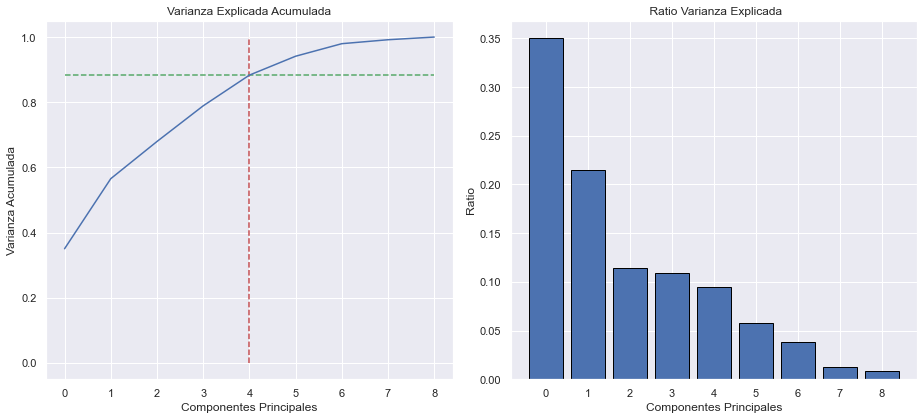

In [14]:
# Graficamente
fig, ax = plt.subplots(1, 2, figsize=(13, 6))

# Varianza acumulada
ax[0].plot(var_acum)

# Líneas de guía
ax[0].vlines(x=4, ymax=1, ymin=0, colors='r', linestyles='--')
ax[0].hlines(y=var_acum[4], xmax=8, xmin=0, colors='g', linestyles='--')

ax[0].set_ylabel('Varianza Acumulada')
ax[0].set_xlabel('Componentes Principales')
ax[0].set_title('Varianza Explicada Acumulada')

# Ratio de varianza explicada
ax[1].bar(
            np.arange(len(pca.explained_variance_ratio_)),
            pca.explained_variance_ratio_,
            edgecolor='black'
)

ax[1].set_ylabel('Ratio')
ax[1].set_xlabel('Componentes Principales')
ax[1].set_title(' Ratio Varianza Explicada')

ax[1].set_xticks(np.arange(len(pca.explained_variance_ratio_)))

fig.tight_layout()
plt.show();

#### Se esta en condiciones de transformar/proyectar el dataset a esta nueva base de ahora 5 componentes y que explica casi un 90% de la varianza en los datos. La tranformación se realiza de la siguiente manera (aplicando el siguiente [algoritmo](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.IncrementalPCA.html)):

In [15]:
# Inicializo el incrementalPCA para la cantidad de componentes seleccionada
acp_final = IncrementalPCA(n_components=5)

In [16]:
# Fit y Transform de los datos al nuevo espacio vectorial  
acp_proy = acp_final.fit_transform(df_ACP)

In [17]:
# Verifico la forma del nuevo df
acp_proy.shape

(696, 5)

In [18]:
# Convierto en el array acp_proy en df
df_ACP_proy = pd.DataFrame(
    acp_proy,
    columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5'],
)
df_ACP_proy.head()

,PC1,PC2,PC3,PC4,PC5
0,0.244050,0.142415,-0.992519,-0.595970,-0.326938
1,2.829196,-0.876135,0.871385,0.152267,1.387119
2,-1.795622,-0.441477,0.382530,0.674612,-0.364798
3,1.019758,-0.952211,0.322748,-0.159247,0.625074
4,-2.504100,-0.857083,-0.122397,-1.040674,0.604026


### A modo de resumen:
#### - df_ACP_proy es un nuevo dataframe que explica cerca del 90% de la varianza original de los datos  seleccionados para este análisis y que redujo su dimensionalidad (N° de columnas) de 9 a 5 a través de un ACP.